In [8]:
import numpy as np
import xarray as xr
import pandas as pd

from os import listdir
from os.path import isfile, join
import os
import datetime as dt
import scipy.io
import glob
import time
import sys


# Plotting
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.colors as colors
import matplotlib as mpl
import cmocean
import cmocean.cm as cmo
import cartopy.crs as ccrs
import cartopy.feature as cft
import matplotlib.dates as mdates
import plotly.express as px
from matplotlib.ticker import NullFormatter
from matplotlib import rc
import seaborn as sns




def ProgressBar(Total, Progress, BarLength=20, ProgressIcon="#", BarIcon="-"):
    try:
        # You can't have a progress bar with zero or negative length.
        if BarLength <1:
            BarLength = 20
        # Use status variable for going to the next line after progress completion.
        Status = ""
        # Calcuting progress between 0 and 1 for percentage.
        Progress = float(Progress) / float(Total)
        # Doing this conditions at final progressing.
        if Progress >= 1.:
            Progress = 1
            Status = "\r\n"    # Going to the next line
        # Calculating how many places should be filled
        Block = int(round(BarLength * Progress))
        # Show this
        return Bar
    except:
        return "ERROR"


def ShowBar(Bar):
    sys.stdout.write(Bar)
    sys.stdout.flush()

# Measuring the difference in floe size dynamics across the classes

In [3]:
year = 2019
df = pd.read_csv('/g/data/ia40/sea-ice-classification/dataframes/analysis_fsd_raw_'+str(year)+'.csv')
df_kmeans = pd.read_csv('/g/data/ia40/sea-ice-classification/dataframes/kmeans_'+str(year)+'.csv')
df['k'] = df_kmeans['k']
unique_dates = df['date'].unique()
df.groupby('k').describe()

Unnamed: 0                                                            \
       count          mean           std     min        25%        50%   
k                                                                        
0   243101.0  3.596447e+06  1.932728e+06  6155.0  2101921.0  3516027.0   
1   547018.0  3.431001e+06  1.297324e+06  6483.0  2404088.5  3368060.5   
2  1314493.0  4.014657e+06  1.761368e+06   564.0  2743370.0  4267875.0   

                        dafsd_latm            ... longitude          latitude  \
         75%        max      count      mean  ...       75%    max      count   
k                                             ...                               
0  5295206.0  6771173.0   243101.0 -0.002599  ...     272.5  359.5   243101.0   
1  4419365.5  6771131.0   547018.0 -0.000219  ...     275.5  359.5   547018.0   
2  5478721.0  6771130.0  1314493.0 -0.002374  ...     310.5  359.5  1314493.0   

                                                                               
        mean       std        min        25%        50%        75%        max  
k                                                                              
0 -63.715727  4.782258 -77.629898 -67.220253 -63.846264 -59.922382 -53.038300  
1 -65.336016  4.243378 -77.629898 -68.225563 -65.601395 -61.953148 -53.038300  
2 -70.719298  4.184834 -77.629898 -74.108917 -71.306648 -67.730186 -57.005028  

[3 rows x 72 columns]

In [13]:
print('Mean')
print(df.groupby('k').mean(numeric_only=True))
print('STD')
print(df.groupby('k').std(numeric_only=True))
print('Sum')
print(df.groupby('k').sum(numeric_only=True))

Mean
     Unnamed: 0  dafsd_latm    dafsd_latg  dafsd_weld  dafsd_newi  dafsd_wave  \
k                                                                               
0  3.596447e+06   -0.002599  9.233755e-06    0.036792    0.052240   -0.427440   
1  3.431001e+06   -0.000219  4.172837e-07    0.202065    0.092614   -0.026943   
2  4.014657e+06   -0.002374  1.714688e-07    0.155300    0.320661   -0.004398   

    pancake   longitude   latitude  
k                                   
0  6.853505  187.574673 -63.715727  
1  5.692146  187.612803 -65.336016  
2  0.370604  216.895351 -70.719298  
STD
     Unnamed: 0  dafsd_latm  dafsd_latg  dafsd_weld  dafsd_newi  dafsd_wave  \
k                                                                             
0  1.932728e+06    0.021158    0.000028    0.495563    0.666969    2.231981   
1  1.297324e+06    0.005914    0.000004    0.536900    0.579663    0.685607   
2  1.761368e+06    0.025242    0.000002    0.640681    1.397264    0.274739   

    

In [ ]:
# Plotting
sns.set_context("talk")
# set figure size
plt.figure(figsize=(9,6))
# Time series plot with Seaborn lineplot()
sns.lineplot(x="date", y="positiveIncrease", 
            data=corona_ny, ci=None)
# axis labels
plt.xlabel("Date", size=14)
plt.ylabel("Daily New Cases", size=14)
# save image as PNG file
plt.savefig("Time_Series_Plot_with_Seaborn.png",
                    format='png',
                    dpi=150)

In [ ]:
# Draw a nested barplot by species and sex
ax = plt.subplot(1, 2, 1)
g = sns.catplot(
    data=df, kind="bar",
    x="k", y="dafsd_latm", #hue="sex",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Lateral melt [m/day]")
#g.legend.set_title("")

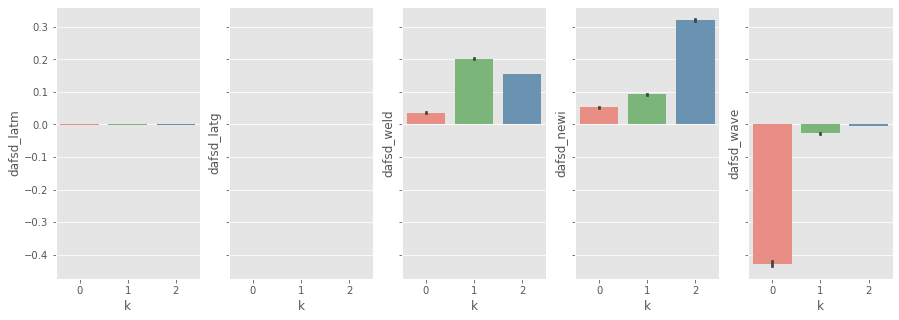

In [34]:
palette = sns.color_palette([(0.9805, 0.5000, 0.4453, 1.0), (0.4416, 0.7490, 0.4322, 1.0), (0.3639, 0.5755, 0.748, 1.0)])
plt.style.use("ggplot")

fig, axes = plt.subplots(1, 5, figsize=(15, 5), sharey=True)
#fig.suptitle('Initial Pokemon - 1st Generation')

# Lateral melt
#sns.barplot(ax=axes[0], x=bulbasaur.index, y=bulbasaur.values)
g = sns.barplot(ax=axes[0],
                data=df, 
                x="k", y="dafsd_latm", 
                alpha=.99, palette=palette)
plt.ylabel("Change in floe radius [m/day]", size=14)

# Lateral growth
g = sns.barplot(ax=axes[1],
                data=df,
                x="k", y="dafsd_latg", 
                alpha=.99, palette=palette)
    
# Welding
g = sns.barplot(ax=axes[2],
                data=df, 
                x="k", y="dafsd_weld", 
                alpha=.99, palette=palette)
    
    
# New ice
g = sns.barplot(ax=axes[3],
                data=df, 
                x="k", y="dafsd_newi", 
                alpha=.99, palette=palette)

# Waves
g = sns.barplot(ax=axes[4],
                data=df, 
                x="k", y="dafsd_wave", 
                alpha=.99, palette=palette)
    
    
    
#add title to each histogram
axs[0].set_title('Lateral melt')
axs[1].set_title('Log-Transformed')
axs[2].set_title('Log-Min/Max')
axs[3].set_title('Log-Min/Max')
axs[4].set_title('Log-Min/Max')
    
    
    
    
                #hue="sex",
#    errorbar="sd", palette="dark", alpha=.6
#g.despine(left=True)
#g.set_axis_labels("", "Lateral melt [m/day]")
#axes[0].set_title(bulbasaur.name)





# # Charmander
# sns.barplot(ax=axes[1], x=charmander.index, y=charmander.values)
# axes[1].set_title(charmander.name)

# # Squirtle
# sns.barplot(ax=axes[2], x=squirtle.index, y=squirtle.values)
# axes[2].set_title(squirtle.name)

<Figure size 1279.68x720 with 0 Axes>

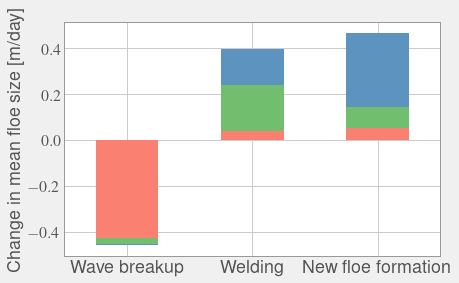

In [29]:

rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
mpl.rcParams.update({'font.size': 22})

mpl.rc('xtick', labelsize=16) 
mpl.rc('ytick', labelsize=16) 

fig = plt.figure(figsize=(13.33,7.5), dpi=96)
plt.style.use("fivethirtyeight")
mpl.rcParams["axes.edgecolor"] = [0.6, 0.6, 0.6]
mpl.rcParams["axes.linewidth"] = 1.0
#mpl.rcParams["axes.set_facecolor"] = [1.0, 0.47, 0.42]


df_grouped = df[["dafsd_wave", "dafsd_weld", "dafsd_newi", "k"]].groupby('k').mean(numeric_only=True)
#df_grouped["dafsd_latm"] = df_grouped["dafsd_latm"]*100#.values*(10^5)
#df_grouped["dafsd_latg"] = df_grouped["dafsd_latg"]*10000
# , "dafsd_latm", "dafsd_latg"


# create DataFrame
df_plot = pd.DataFrame({'1': df_grouped.iloc[0,:].values,
                        '2': df_grouped.iloc[1,:].values,
                        '3': df_grouped.iloc[2,:].values},
                        index=['Wave breakup', 'Welding', 'New floe formation'])# , 'Lateral melt (x$10^3$)', 'Lateral growth (x$10^4$)'])

 
# create stacked bar chart for monthly temperatures
ax = df_plot.plot(kind='bar', stacked=True, 
             color=[(0.9805, 0.5000, 0.4453, 1.0), (0.4416, 0.7490, 0.4322, 1.0), (0.3639, 0.5755, 0.748, 1.0)],
             legend=None)

ax.set_facecolor((1.0, 1.0, 1.0))
# labels for x & y axis
#plt.xlabel('Floe size mechanisms')
plt.ylabel('Change in mean floe size [m/day]', fontsize=18)
plt.xticks(rotation = 0, fontsize=18)
#plt.legend(['Cluster 1','Cluster 2','Cluster 3'], fontsize=16)


# title of plot
#plt.title('Monthly Temperatures in a year')
savepath = '/home/566/nd0349/notebooks/'
plt.savefig(savepath+'dafsd_bar.png', dpi = 1000, bbox_inches="tight")

In [ ]:
# create DataFrame
plt.style.use("ggplot")
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
print(df)
df_grouped = df[["dafsd_wave", "dafsd_weld", "dafsd_newi", "dafsd_latm", "dafsd_latg", "k","date"]].groupby('k','date').mean(numeric_only=True)
df_grouped["dafsd_latm"] = df_grouped["dafsd_latm"]*100#.values*(10^5)
df_grouped["dafsd_latg"] = df_grouped["dafsd_latg"]*10000


df_plot = pd.DataFrame({'1': df_grouped.iloc[0,:].values,
                        '2': df_grouped.iloc[1,:].values,
                        '3': df_grouped.iloc[2,:].values},
                        index=['Wave breakup', 'Welding', 'New ice', 'Lateral melt (x$10^3$)', 'Lateral growth (x$10^4$)'])
 
 
# create stacked bar chart for monthly temperatures
# df_plot.plot(kind='bar', stacked=True, color=[(0.9805, 0.5000, 0.4453, 1.0), (0.4416, 0.7490, 0.4322, 1.0), (0.3639, 0.5755, 0.748, 1.0)])
 
# # labels for x & y axis
# #plt.xlabel('Floe size mechanisms')
# plt.ylabel('Change in mean floe size [m/day]')
 
# # title of plot
# #plt.title('Monthly Temperatures in a year')
# savepath = '/home/566/nd0349/notebooks/'
# plt.savefig(savepath+'dafsd_bar.png', dpi = 600, bbox_inches="tight")

In [96]:
#df_grouped.iloc[0,:].values
df_grouped = df[["dafsd_wave", "dafsd_weld", "dafsd_newi", "dafsd_latm", "dafsd_latg", "k"]].groupby('k').mean(numeric_only=True)
df_grouped
print(df_grouped["dafsd_latg"].values)#*(10^7)
df_grouped["dafsd_latg"]*100000#.values

[9.23375478e-06 4.17283698e-07 1.71468812e-07]


k
0    0.923375
1    0.041728
2    0.017147
Name: dafsd_latg, dtype: float64

## Sectoral analysis

## Sectoral analysis

In [19]:
year = 2019
filename = '/g/data/ia40/sea-ice-classification/kmean_'+str(year)+'.nc'
ds = xr.open_dataset(filename)
LT = ds['LAT']
LN = ds['LON']

# SECTORS
## Ross-Amundsen Sea


def get_sector_idx(sector_name, LN):
    '''
    Get an index for each sector from Hobbs et al.
    '''
    if sector_name == 'RA':
        # Ross-Amundsen
        sector_min = 165
        sector_max = 235
        a = abs(LN[1,:]-sector_min)
        sector_idx_min, = np.unravel_index(a.argmin(),a.shape)
        a = abs(LN[1,:]-sector_max)
        sector_idx_max, = np.unravel_index(a.argmin(),a.shape)
        sector_idx = range(sector_idx_min,sector_idx_max)
    elif sector_name == 'KH':
        # King Hakon
        sector_min = 345
        sector_max = 75
        a = abs(LN[1,:]-sector_min)
        sector_idx_min, = np.unravel_index(a.argmin(),a.shape)
        a = abs(LN[1,:]-sector_max)
        sector_idx_max, = np.unravel_index(a.argmin(),a.shape)
        sector_idx = range(sector_idx_min,sector_idx_max)
    elif sector_name == 'EA':
        # East Antarctica
        sector_min = 75
        sector_max = 165
        a = abs(LN[1,:]-sector_min)
        sector_idx_min, = np.unravel_index(a.argmin(),a.shape)
        a = abs(LN[1,:]-sector_max)
        sector_idx_max, = np.unravel_index(a.argmin(),a.shape)
        print(sector_idx_min)
        print(sector_idx_max)
        sector_idx = ((LN[1,:] > sector_min) & (LN[1,:] < sector_max))
        sector_idx = sector_idx.values
    elif sector_name == 'AB':
        # Amundsen Bellingshaushen
        sector_min = 235
        sector_max = 300
        a = abs(LN[1,:]-sector_min)
        sector_idx_min, = np.unravel_index(a.argmin(),a.shape)
        a = abs(LN[1,:]-sector_max)
        sector_idx_max, = np.unravel_index(a.argmin(),a.shape)
        sector_idx = range(sector_idx_min,sector_idx_max)
    elif sector_name == 'W':
        # Weddell Sea
        sector_min = 300
        sector_max = 345
        a = abs(LN[1,:]-sector_min)
        sector_idx_min, = np.unravel_index(a.argmin(),a.shape)
        a = abs(LN[1,:]-sector_max)
        sector_idx_max, = np.unravel_index(a.argmin(),a.shape)
        sector_idx = range(sector_idx_min,sector_idx_max)
    return sector_idx


NameError: name 'upper_location' is not defined

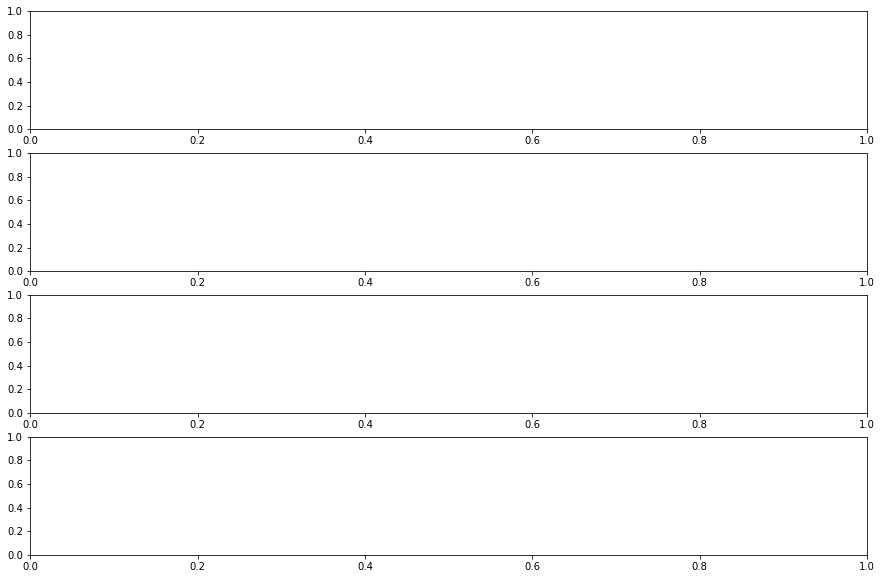

In [22]:
n_days = 365
x_dates = range(0,n_days,5)

fig, axes = plt.subplots(4, 1, figsize=(15, 10), sharey=True)



# Time series plot with Seaborn lineplot()
sns.lineplot(ax=axes[0], x=x_dates, y=upper_location[day_vec,get_sector_idx("RA", LN)])
axes[0].set(ylabel='RA []')

sns.lineplot(ax=axes[1], x="date", y="strocn", hue="k",
            data=df_timeseries, errorbar=None, legend=False,
             palette=[(0.9805, 0.5000, 0.4453, 1.0), (0.4416, 0.7490, 0.4322, 1.0), (0.3639, 0.5755, 0.748, 1.0)])
axes[1].set(ylabel='Ocean []')

sns.lineplot(ax=axes[2], x="date", y="strint", hue="k",
            data=df_timeseries, errorbar=None, legend=False,
             palette=[(0.9805, 0.5000, 0.4453, 1.0), (0.4416, 0.7490, 0.4322, 1.0), (0.3639, 0.5755, 0.748, 1.0)])
axes[2].set(ylabel='Internal []')
    
sns.lineplot(ax=axes[3], x="date", y="strcor", hue="k",
            data=df_timeseries, errorbar=None, legend=False,
             palette=[(0.9805, 0.5000, 0.4453, 1.0), (0.4416, 0.7490, 0.4322, 1.0), (0.3639, 0.5755, 0.748, 1.0)])
axes[3].set(ylabel='Coriolis []')

In [10]:
# What category is new is created in?

# Analysis dataset

variable_list = ['dafsd_newi']
num_variables = np.size(variable_list)

savepath = '/home/566/nd0349/notebooks/'
mypath = '/g/data/ia40/cice-dirs/runs/waves-10/history/'
year = 2019

NFSD = np.asarray([2.6884, 9.7984, 21.6721, 40.7349, 70.1407, 113.6938, 175.5771, 259.8365, 369.6202, 506.2401, 668.2091, 850.4769])
floe_binwidth = np.asarray([5.2438, 8.9763, 14.7711, 23.3545, 35.4569, 51.6493, 72.1173, 96.4015, 123.1658, 150.0741, 173.8638, 190.6719])


os.chdir(mypath)
file_dates = []
print(year)
filename =  mypath + 'iceh.' + str(year) + '-01-01.nc'

onlyfiles = glob.glob("{path}/iceh.*{year}*".format(path=mypath, year=year))
onlyfiles.sort()
print(filename)
ds = xr.open_dataset(filename)
LN = ds.TLON.values
LT = ds.TLAT.values
# Get the total number of grid points
size = 1
for dim in np.shape(LN): size *= dim
aice_data = ds['aice'][0,:,:]
mask1 = np.ma.masked_where(LT > 0.0, aice_data)
mask2 = np.ma.masked_where(aice_data < 0.15, aice_data)
master_mask = mask1.mask | mask2.mask
mask = master_mask

X_out =  np.ma.masked_array(np.empty((size,1)), mask=mask)

# Loop over the files in that year
for filecount, file in enumerate(onlyfiles):
#    progressBar = "\rProgress: " + ProgressBar(len(onlyfiles), filecount+1, 20, '#', '.')
#    ShowBar(progressBar)

    # Open the file
    filename = file
    file_dates.append(np.datetime64(file[-13:-3]))
    ds = xr.open_dataset(filename)

    # Get and apply masks to remove the ocean
    aice_data = ds['aice'][0,:,:]
    mask1 = np.ma.masked_where(LT > 0.0, aice_data)
    mask2 = np.ma.masked_where(aice_data < 0.15, aice_data)
    master_mask = mask1.mask | mask2.mask
    mask = master_mask

    # Get all the variables
    for counter, exp in enumerate(variable_list):
        data3d = ds[exp][0,:,:,:]
        data = np.zeros(LN.shape)
#        for nf in range(0,len(floe_binwidth)):
#            data += data3d[0,:,:].values*NFSD[nf]
        data = data3d[0,:,:].values
        data_masked = np.ma.masked_where(mask, data)
        data_masked_vec = data_masked.compressed()
        row_length, = data_masked_vec.shape

        if counter == 0: 
            # First file, then initialise X_temp
            X_single_file = data_masked_vec.reshape(row_length,1)
        else:
            # Else just concatenate the new data on
            X_single_file = np.concatenate([X_single_file, data_masked_vec.reshape(row_length,1)],axis=1)

    data4d = ds['afsdn'][:,:,:,:]
    data = np.zeros(LN.shape)
    for nf in range(0,len(floe_binwidth)):
        data += data4d[0,0,:,:].values*floe_binwidth[0]
            
        data_masked = np.ma.masked_where(mask, data)
        data_masked_vec = data_masked.compressed()
        row_length, = data_masked_vec.shape
    if counter == 0: 
        # First file, then initialise X_temp
        X_single_file = data_masked_vec.reshape(row_length,1)
    else:
        # Else just concatenate the new data oncl
        X_single_file = np.concatenate([X_single_file, data_masked_vec.reshape(row_length,1)],axis=1)
    
    
    # Add on the corresponding coordinates
    LN_masked = np.ma.masked_where(mask, LN)
    LN_vec = LN_masked.compressed()
    LT_masked = np.ma.masked_where(mask, LT)
    LT_vec = LT_masked.compressed()
    X_single_file = np.concatenate([X_single_file, LN_vec.reshape(row_length,1), LT_vec.reshape(row_length,1)],axis=1)

    if filecount == 0: 
        # Day 1, then initialise the year file
        X_year = X_single_file
        datetime_vec =  np.tile(np.datetime64(file[-13:-3]),(row_length,1))
    else:
        X_year = np.concatenate([X_year, X_single_file],axis=0)
        datetime_vec = np.concatenate([datetime_vec, np.tile(np.datetime64(file[-13:-3]),(row_length,1))],axis=0)
# Save as dataframe
df_raw = pd.DataFrame(X_year, columns = variable_list+['longitude','latitude'])#,'date'])
df_raw['date'] = datetime_vec
print(datetime_vec.shape)
df_raw = df_raw.dropna()

2019
/g/data/ia40/cice-dirs/runs/waves-10/history/iceh.2019-01-01.nc
(6776612, 1)


In [12]:
year = 2019
df_tmp = pd.read_csv('/g/data/ia40/sea-ice-classification/dataframes/kmeans_'+str(year)+'.csv')

savepath = '/g/data/ia40/sea-ice-classification/dataframes/'
savefilename = 'newi_1_'+str(year)+'.csv'
df_raw['k'] = df_tmp['k']
df_raw.to_csv(savepath+savefilename)
df_raw.describe()

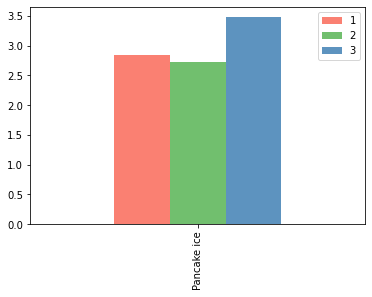

In [23]:
df_grouped = df_raw[["dafsd_newi", "k"]].groupby('k').mean(numeric_only=True)
df_grouped.describe()

df_plot = pd.DataFrame({'1': df_grouped.iloc[0,:].values,
                        '2': df_grouped.iloc[1,:].values,
                        '3': df_grouped.iloc[2,:].values},
                        index=['Pancake ice'])
 
 
# create stacked bar chart for monthly temperatures
#df_plot.plot(kind='bar', stacked=True, color=[(0.9805, 0.5000, 0.4453, 1.0), (0.4416, 0.7490, 0.4322, 1.0), (0.3639, 0.5755, 0.748, 1.0)])
ax = df_plot.plot.bar(color=[(0.9805, 0.5000, 0.4453, 1.0), (0.4416, 0.7490, 0.4322, 1.0), (0.3639, 0.5755, 0.748, 1.0)])

In [21]:
df_raw

,dafsd_newi,longitude,latitude,date,k
564,0.000009,312.5,-77.629898,2019-01-01,2.0
565,0.000028,313.5,-77.629898,2019-01-01,2.0
566,0.000028,314.5,-77.629898,2019-01-01,2.0
567,0.000023,315.5,-77.629898,2019-01-01,2.0
568,0.000018,316.5,-77.629898,2019-01-01,2.0
...,...,...,...,...,...
6771169,1.369794,52.5,-61.291443,2019-12-31,NaN
6771170,1.702933,53.5,-61.291443,2019-12-31,NaN
6771171,1.835697,54.5,-61.291443,2019-12-31,NaN
6771172,1.655716,55.5,-61.291443,2019-12-31,NaN
